# Lab 4: Pandas COVID
Submitted By: Julian Singkham  
Date: 01/15/2021

## Abstract
The purpose of this lab is to further our understanding of the pandas library by cleaning data and manipulating data with time. Additionally we had to interpret the data and hypothesis why the data is what it is.
* The first objective was to learn how to filter data by a column value. For this the covid data frame was filtered by any day with deaths above 20.
* The second objective was to manipulate the covid data by creating a plot with time units of days, weeks, and months. 
* The final objective was familiarize ourselves with how correlation works and how correlation can reveal details about the data.  

The data utilized in this lab is the cvoid statisitcs for Wisconisn from https://covidtracking.com/data/state/wisconsin

Your solution is trained on the entire dataset, which isn’t ideal and enables overfitting, so we need to fix that.  Divide the iris data into training and testing sets using sklearn.model_selection.train_test_split:



Use your kNN class to train only using the training dataset and classify the flowers by species using only the test dataset.  Use sklearn.metrics.accuracy_score to compare the predicted labels to the known labels for the testing set.  Plot and interpret the accuracy vs k for odd values of k = 1 to 11. 

Additionally, you should calculate the precision and recall scores (using the appropriate SKLearn methods) and present the results alongside the accuracy results mentioned in the previous paragraph.

Based on the scatter plots of the features, which features (or combinations of features) appear to be able to best separate the classes?
Which value of k gives the best (highest) accuracy, recall, and/or precision?
What do you think the potential downsides of the k-nearest neighbors algorithm are? Why do you think it might not be used as widely as other methods?

### Parameters

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### Functions



Imports csv file into panda data frame.

**Param** csv: Name of the CSV file.  
**Return**:A data frame of the csv file.

In [2]:
def import_csv_df(csv):
    df = pd.read_csv(csv)
    return df

This is a lagging cross correlation function using iteration. 

**Param** lag: How many days to shift. Default to 0.  
**Param** df_x: A pandas series. Independant variable.   
**Param** df_y: A pandas series.  Dependant variable.  
**Return**: The correlation between the two series shifted by (lag) days.

In [3]:
def crosscorr_looping(df_x, df_y, lag=0):
    df_x_shifted = pd.Series(index=df_x.index)
    df_y_shifted = pd.Series(index=df_y.index)
    
    i = 0
    for date,value in df_x.iteritems():
        if(i + lag < len(df_x)):
            df_x_shifted.iloc[i+lag] = value
        i = i + 1
    
    i = 0
    for date,value in df_y.iteritems():
        if(i + lag < len(df_y)):
            df_y_shifted.iloc[i+lag] = value
        i = i + 1
    return df_x_shifted.corr(df_y_shifted)

This is a lagging cross correlation function using df.shift() method.

**Param** lag: How many days to shift. Default to 0.  
**Param** df_x: A pandas series. Independant variable.   
**Param** df_y: A pandas series.  Dependant variable.  
**Return**: The correlation between the two series shifted by (lag) days.

In [4]:
def crosscorr_df(df_x, df_y, lag=0):
    return df_x.shift(lag).corr(df_y.shift(lag))

### Main

In [5]:
# Import csv to data frame
df = import_csv_df("wisconsin-history.csv")

df.describe()

,death,deathConfirmed,deathIncrease,deathProbable,hospitalized,hospitalizedCumulative,hospitalizedCurrently,hospitalizedIncrease,inIcuCumulative,inIcuCurrently,...,totalTestResults,totalTestResultsIncrease,totalTestsAntibody,totalTestsAntigen,totalTestsPeopleAntibody,totalTestsPeopleAntigen,totalTestsPeopleViral,totalTestsPeopleViralIncrease,totalTestsViral,totalTestsViralIncrease
count,300.000000,255.000000,317.000000,199.000000,289.000000,289.000000,287.000000,317.000000,284.000000,287.000000,...,3.170000e+02,317.000000,0.0,0.0,0.0,0.0,2.460000e+02,317.000000,1.0,317.000000
mean,1602.760000,1784.631373,17.914826,97.080402,7881.152249,7881.152249,732.006969,71.624606,1089.109155,187.770035,...,1.856256e+06,17900.400631,NaN,NaN,NaN,NaN,1.472553e+06,9237.044164,152217.0,0.000000
std,1529.972049,1398.206722,24.914709,132.986380,6536.004361,6536.004361,581.444361,70.683560,543.807489,110.913480,...,1.774007e+06,12962.608329,NaN,NaN,NaN,NaN,8.683197e+05,10799.466037,NaN,12109.734313
min,3.000000,340.000000,-1.000000,7.000000,337.000000,337.000000,165.000000,0.000000,175.000000,51.000000,...,7.000000e+00,0.000000,NaN,NaN,NaN,NaN,1.233590e+05,0.000000,152217.0,-152217.000000
25%,613.750000,800.500000,3.000000,7.000000,2976.000000,2976.000000,320.000000,26.000000,680.000000,104.000000,...,2.245080e+05,8455.000000,NaN,NaN,NaN,NaN,7.000910e+05,3933.000000,152217.0,0.000000
50%,1046.000000,1168.000000,9.000000,10.000000,5545.000000,5545.000000,379.000000,45.000000,991.000000,134.000000,...,1.387228e+06,16257.000000,NaN,NaN,NaN,NaN,1.355776e+06,9443.000000,152217.0,0.000000
75%,2044.750000,2426.000000,17.000000,161.000000,11597.000000,11597.000000,1108.500000,96.000000,1518.000000,260.000000,...,3.103682e+06,26539.000000,NaN,NaN,NaN,NaN,2.272050e+06,12749.000000,152217.0,0.000000
max,5679.000000,5248.000000,128.000000,431.000000,22705.000000,22705.000000,2278.000000,337.000000,2113.000000,456.000000,...,5.674434e+06,56991.000000,NaN,NaN,NaN,NaN,2.928143e+06,123359.000000,152217.0,152217.000000


In [6]:
#Remove all rows that have a death increase less than 20. 
#There are 68 days where more than 20 people have died due to covid
df_20 = df[df['deathIncrease'] > 20]
print(df_20.shape)

#Set index as date
df.index = pd.to_datetime(df['date'])
df = df.reindex(index=df.index[::-1])

(68, 42)


<AxesSubplot:xlabel='date'>

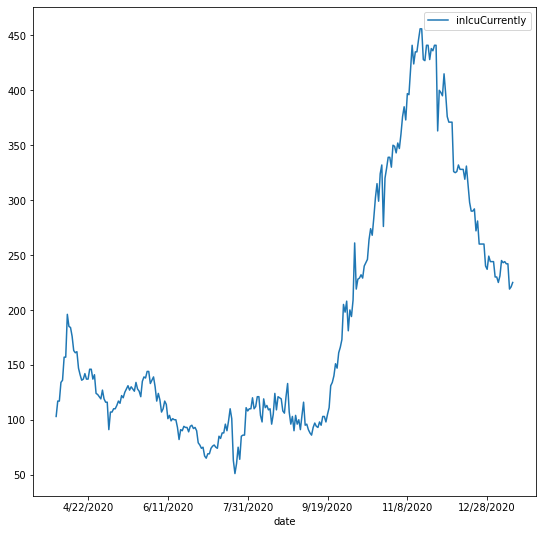

In [7]:
#Plot the amount of people in ICU over time
df.plot(x = 'date', y = 'inIcuCurrently', kind = 'line', figsize = (9,9))

<AxesSubplot:xlabel='date'>

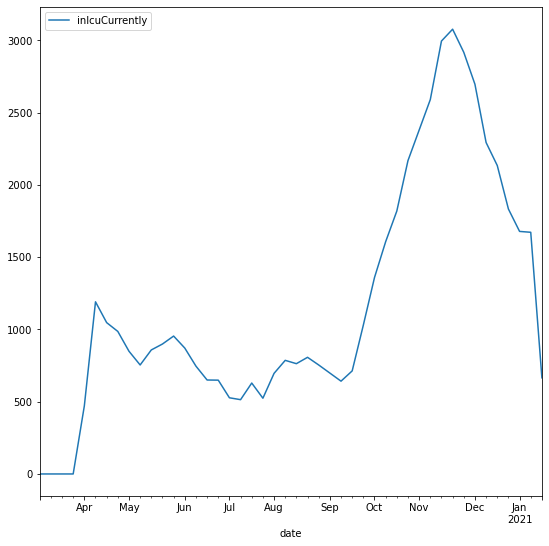

In [8]:
#Plot the amount of people in ICU over time on a weekly basis
df_weekly = pd.DataFrame()
df_weekly = df.resample('W').sum()
df_weekly.plot(y = 'inIcuCurrently', kind = 'line', figsize = (9,9))

<AxesSubplot:xlabel='date'>

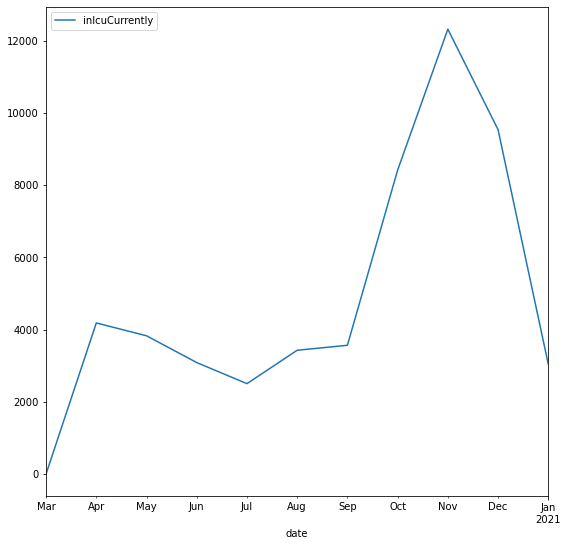

In [9]:
#Plot the amount of people in ICU over time on a monthly basis
df_monthly = pd.DataFrame()
df_monthly = df.resample('m').sum()
df_monthly.plot(y = 'inIcuCurrently', kind = 'line', figsize = (9,9))

* The initial spike of covid ICU patients in April 2020 is primarily caused by the introduction of Covid in the US in January/February and lockdown didn't take into affect until March 2020.  
* The effects of quarentine is evident in the downward trend of ICU patients from April 2020 - July 2020.  
* The slight upward trend from July 2020 - September 2020 can be attributed to states relaxing covid restrictions and general unrest due to quarentine.  
* The stark jump in cases from September 2020 - November 2020 can primarily be attributed to presidential campaigning and in-person voting.  
* The stark decrease in ICU patients from November 2020 - January 2020 can be attributed to the reintegration of lockdown protocols and the affects of the election are not present.

In [10]:
df.corr()

,death,deathConfirmed,deathIncrease,deathProbable,hospitalized,hospitalizedCumulative,hospitalizedCurrently,hospitalizedIncrease,inIcuCumulative,inIcuCurrently,...,totalTestResults,totalTestResultsIncrease,totalTestsAntibody,totalTestsAntigen,totalTestsPeopleAntibody,totalTestsPeopleAntigen,totalTestsPeopleViral,totalTestsPeopleViralIncrease,totalTestsViral,totalTestsViralIncrease
death,1.000000,0.999838,0.621332,0.987097,0.988322,0.988322,0.713965,0.552757,0.942071,0.661853,...,0.962013,0.636734,NaN,NaN,NaN,NaN,0.914991,0.129424,NaN,-0.000160
deathConfirmed,0.999838,1.000000,0.611196,0.984558,0.989558,0.989558,0.704254,0.546340,0.953983,0.669731,...,0.960972,0.552768,NaN,NaN,NaN,NaN,0.921641,-0.022338,NaN,-0.000190
deathIncrease,0.621332,0.611196,1.000000,0.512819,0.645497,0.645497,0.707111,0.834837,0.613513,0.698918,...,0.650779,0.623694,NaN,NaN,NaN,NaN,0.625801,0.219748,NaN,-0.009579
deathProbable,0.987097,0.984558,0.512819,1.000000,0.948820,0.948820,0.519916,0.347800,0.905738,0.480024,...,0.907937,0.302624,NaN,NaN,NaN,NaN,0.861847,-0.143069,NaN,NaN
hospitalized,0.988322,0.989558,0.645497,0.948820,1.000000,1.000000,0.795345,0.608164,0.975240,0.747361,...,0.988864,0.697104,NaN,NaN,NaN,NaN,0.962650,0.141046,NaN,-0.000191
hospitalizedCumulative,0.988322,0.989558,0.645497,0.948820,1.000000,1.000000,0.795345,0.608164,0.975240,0.747361,...,0.988864,0.697104,NaN,NaN,NaN,NaN,0.962650,0.141046,NaN,-0.000191
hospitalizedCurrently,0.713965,0.704254,0.707111,0.519916,0.795345,0.795345,1.000000,0.836297,0.791865,0.987196,...,0.806518,0.769537,NaN,NaN,NaN,NaN,0.811046,0.225484,NaN,-0.001079
hospitalizedIncrease,0.552757,0.546340,0.834837,0.347800,0.608164,0.608164,0.836297,1.000000,0.661730,0.831736,...,0.669361,0.728173,NaN,NaN,NaN,NaN,0.665572,0.393727,NaN,-0.005628
inIcuCumulative,0.942071,0.953983,0.613513,0.905738,0.975240,0.975240,0.791865,0.661730,1.000000,0.737002,...,0.991213,0.768733,NaN,NaN,NaN,NaN,0.993263,0.192048,NaN,-0.000155
inIcuCurrently,0.661853,0.669731,0.698918,0.480024,0.747361,0.747361,0.987196,0.831736,0.737002,1.000000,...,0.761210,0.729628,NaN,NaN,NaN,NaN,0.787973,0.214065,NaN,0.001508


* Correlation is the measure of how linear a set of data is. A correlation of 1 means the two data are linearly correlated.
* The correlation between deaths and hospitalized is 0.989558. This makes sense due to the fact that all hospitals prioritize covid patients over anyone else, and the vast majority of those infected with covid go to the hospital when incapacitated.
* Similarly the correlation between deaths and inIcuCumulative is 0.942071. This number is high number is due to the shortage of ventilators units and under staffing of trained ICU staff. 

In [11]:
%%time
# Calculate the number of days to shift to get the maxmaximum correlation between when a patient is 
# hospitalized (hospitalizedCurrently) and when he/she is in the ICU (inIcuCurrently).
i = 0
temp = 0
max_correlation = 0
day = 0
for i in range(df['hospitalizedCurrently'].size):
    temp = crosscorr_df(df['hospitalizedCurrently'], df['inIcuCurrently'], i)
    if(temp > max_correlation):
        max_correlation = temp
        day = i
print(f"{day} {max_correlation}")

285 1.0
Wall time: 113 ms


C:\Users\singkhamj\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\singkhamj\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2480: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [12]:
%%time
# Calculate the number of days to shift to get the maxmaximum correlation between when a patient is 
# hospitalized (hospitalizedCurrently) and when he/she is in the ICU (inIcuCurrently).
i = 0
temp = 0
max_correlation = 0
day = 0
for i in range(df['hospitalizedCurrently'].size):
    temp = crosscorr_looping(df['hospitalizedCurrently'], df['inIcuCurrently'], i)
    if(temp > max_correlation):
        max_correlation = temp
        day = i
print(f"{day} {max_correlation}")

<ipython-input-3-4a48428ecd19>:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df_x_shifted = pd.Series(index=df_x.index)
<ipython-input-3-4a48428ecd19>:3: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df_y_shifted = pd.Series(index=df_y.index)


285 1.0
Wall time: 4.73 s


* 285 days apart is the maximum correlation between when a patient is hospitalized (hospitalizedCurrently) and when he/she is in the ICU (inIcuCurrently). The correlation value is 1.0.  
* The df (vectorized) version took 126ms while the iteration version took 5.1s. This puts the df version at 40.48x faster than the iterated version. This sheer difference in compute time shows how vectorization allows for much more efficient computing.

Text(0.5, 1.0, 'Correlation between hospitalizedCurrently and inIcuCurrently')

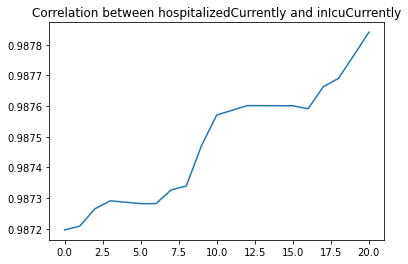

In [13]:
# Plot of the correlation coefficients for 20 days between hospitalizedCurrently and inIcuCurrently
correlation_array = []
x_array = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
i = 0
while(i < 21):
    correlation_array += [crosscorr_df(df['hospitalizedCurrently'], df['inIcuCurrently'], i)]
    i += 1
plt.plot(x_array, correlation_array)
plt.title("Correlation between hospitalizedCurrently and inIcuCurrently")

Text(0.5, 1.0, 'Correlation between deathIncrease and inIcuCurrently')

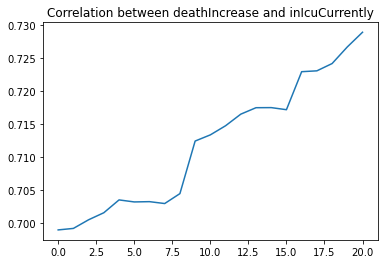

In [14]:
# Plot of the correlation coefficients for 20 days between deathIncrease and inIcuCurrently
correlation_array = []
x_array = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
i = 0
while(i < 21):
    correlation_array += [crosscorr_df(df['deathIncrease'], df['inIcuCurrently'], i)]
    i += 1
plt.plot(x_array, correlation_array)
plt.title("Correlation between deathIncrease and inIcuCurrently")

Text(0.5, 1.0, 'Correlation between positiveIncrease and hospitalizedIncrease')

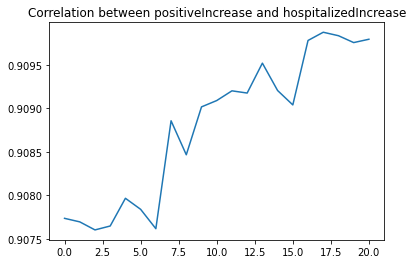

In [15]:
# Plot of the correlation coefficients for 20 days between positiveIncrease and hospitalizedIncrease
correlation_array = []
x_array = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
i = 0
while(i < 21):
    correlation_array += [crosscorr_df(df['positiveIncrease'], df['hospitalizedIncrease'], i)]
    i += 1
plt.plot(x_array, correlation_array)
plt.title("Correlation between positiveIncrease and hospitalizedIncrease")